# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Scaling the data
from sklearn.preprocessing import StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [ ]:
pd.set_option('display.max_columns',None)

# Data Import

In [ ]:
data= pd.read_csv('data_dropped.csv')

In [ ]:
data = data.drop("Unnamed: 0",axis=1)

In [ ]:
X = data.drop(columns=['TYPE'])
y = data['TYPE']

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
1    138
0     86
Name: count, dtype: int64

In [ ]:
X['Menopause'].value_counts()

Menopause
0    133
1     91
Name: count, dtype: int64

# Correlation Analysis

In [ ]:
dt= data
dt

AFP     AG  Age   ALB    ALP   ALT   AST  BASO#  BASO%   BUN    Ca  \
0    34.24  23.98   61  39.9   95.0   9.0  13.0   0.02   0.30  3.21  2.62   
1     1.50  18.40   39  45.4   77.0   9.0  18.0   0.03   0.60  3.80  2.57   
2     2.75  16.60   45  39.2   26.0  16.0  17.0   0.05   0.74  5.27  2.35   
3     2.36  19.97   45  35.0   47.0  21.0  27.0   0.01   0.10  4.89  2.48   
4     3.79  17.39   44  32.9  118.0  51.0  32.0   0.02   0.42  4.47  2.49   
..     ...    ...  ...   ...    ...   ...   ...    ...    ...   ...   ...   
219   1.92  17.97   57  39.1   96.0  12.0  28.0   0.00   0.00  4.09  2.44   
220   9.07  25.27   68  37.0   85.0  11.0  17.0   0.01   0.10  6.90  2.24   
221   2.29  10.40   64  38.9   82.0   7.0  27.0   0.02   0.30  3.48  1.01   
222   5.03  26.65   42  39.1  763.0   9.0  30.0   0.04   0.60  2.72  2.46   
223   2.87   7.90   66  46.0   96.0  27.0  39.0   0.05   0.70  4.40  2.52   

       CA125  CA19-9   CEA     CL  CO2CP  CREA  DBIL   EO#   EO%   GGT   GLO  \
0    2444.00   19.98  2.46  100.1   22.3  45.0   2.6  0.04  0.50  13.0  32.1   
1      56.08   12.18  0.77  102.6   22.2  48.0   4.7  0.03  0.60  10.0  32.5   
2    2555.00   18.41  0.82  103.2   24.0  65.7   2.9  0.00  0.07  17.0  26.9   
3    1391.00   11.15  0.42   99.6   26.2  70.3   2.2  0.11  1.60  24.0  31.5   
4      55.97   22.57  1.33   99.3   20.1  80.7   5.9  0.01  0.19  75.0  39.4   
..       ...     ...   ...    ...    ...   ...   ...   ...   ...   ...   ...   
219   258.00    8.76  0.98  102.2   26.2  59.0   3.5  0.09  2.50   9.0  36.0   
220    47.25   48.96  2.99   93.8   27.6  84.0   4.8  0.03  0.20  13.0  31.7   
221  2394.00    6.33  1.25   99.4   24.9  56.0   2.0  0.02  0.30  12.0  28.4   
222  2154.00   24.49  0.80  102.0   16.2  73.0   4.3  0.00  0.00  10.0  26.2   
223  2592.00    7.04  0.59  103.1   28.1  51.0   2.9  0.04  0.60  17.0  36.5   

      GLU.    HCT      HE4    HGB  IBIL     K  LYM#  LYM%   MCH   MCV  \
0    10.50  0.417   934.10  128.0   4.2  4.38  1.27  17.2  26.2  85.3   
1     4.64  0.391    47.56  131.0  10.1  4.30  1.10  23.7  28.4  84.6   
2     4.76  0.372   853.50  123.0   8.0  4.70  1.73  27.2  30.6  92.6   
3     4.07  0.383   404.90  122.0   3.1  4.77  1.98  28.8  27.7  87.0   
4     7.52  0.306    49.95   96.5   2.2  4.89  0.52  11.1  21.8  69.0   
..     ...    ...      ...    ...   ...   ...   ...   ...   ...   ...   
219   4.61  0.367   376.50  120.0   6.7  4.27  0.73  20.3  28.9  88.4   
220   7.40  0.330   157.50  109.0   7.4  3.28  1.45   9.2  29.1  88.0   
221   4.59  0.375   682.70  121.0   3.7  4.39  1.16  16.9  30.4  94.2   
222   3.96  0.450  1309.00  147.0  10.3  4.35  1.21  17.4  27.1  83.0   
223   5.90  0.395   933.70  124.0   6.4  4.70  1.44  20.0  30.0  95.6   

     Menopause    Mg  MONO#  MONO%    MPV     Na   NEU    PCT   PDW  PHOS  \
0            1  0.82   0.41   5.50  10.00  142.0  76.5  0.300  11.2  1.09   
1            0  1.00   0.25   5.40  11.40  138.9  69.7  0.130  15.2  0.97   
2            1  1.11   0.42   6.55   7.38  139.1  65.5  0.250  17.4  1.25   
3            0  1.08   0.69  10.00  10.40  141.0  59.5  0.280  11.9  0.94   
4            0  0.93   0.07   1.51   9.49  131.9  86.8  0.265  19.1  0.68   
..         ...   ...    ...    ...    ...    ...   ...    ...   ...   ...   
219          1  0.88   0.16   4.50  12.00  142.1  72.7  0.140  13.4  1.07   
220          1  0.70   0.94   5.90  10.80  137.3  84.6  0.330  12.5  1.18   
221          1  0.89   0.35   5.10   9.70  143.6  77.4  0.320  10.9  1.07   
222          0  0.98   0.30   4.30  11.40  140.5  77.7  0.320  14.5  1.03   
223          1  0.90   0.36   5.00  12.00  144.6  73.7  0.220  15.8  1.46   

     PLT   RBC   RDW  TBIL    TP     UA  TYPE  
0    304  4.89  12.7   6.8  72.0  119.2     0  
1    112  4.62  12.0  14.8  77.9  209.2     0  
2    339  4.01  14.6  10.9  66.1  215.6     0  
3    272  4.40  13.4   5.3  66.5  206.0     0  
4    279  4.44  21.7   8.1  72.3  218.2     0  
..   ...   ...   ...   ...   ..

In [ ]:
# dt = dt.drop("Unnamed: 0",axis=1)

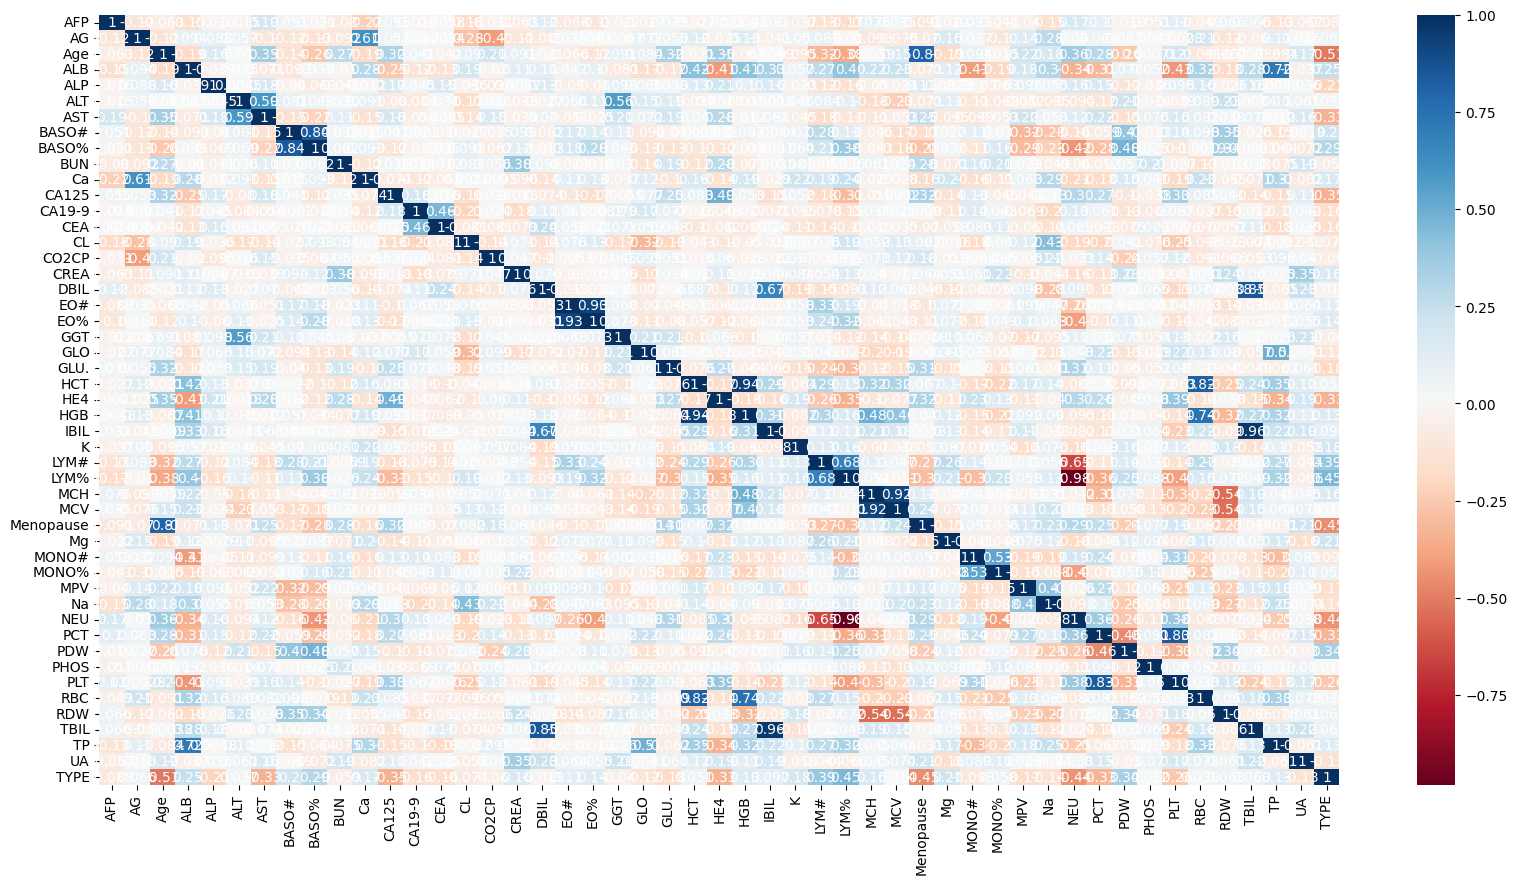

In [ ]:
corr = dt.corr()

plt.figure(figsize=(20,10)) # this sets the size of the figure to width=10 inches, height=8 inches
sns.heatmap(corr, annot=True, cmap='RdBu', annot_kws={"size": 10, "color": "white"})
plt.show()

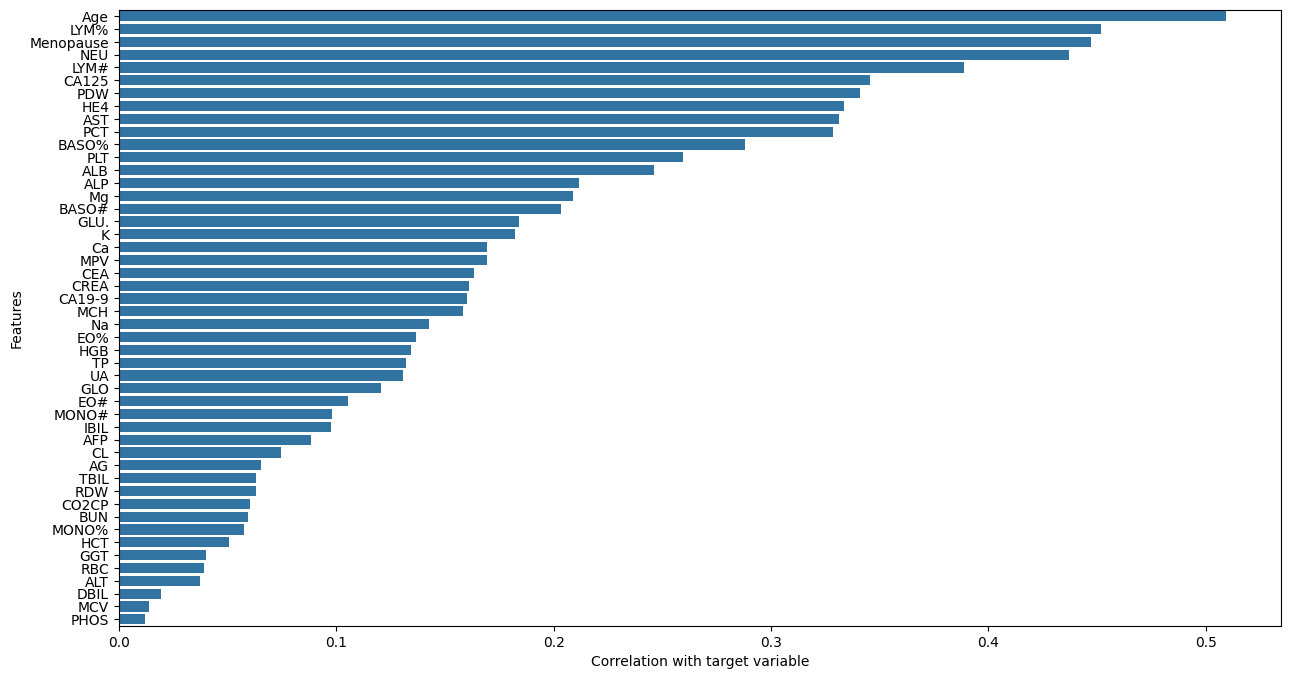

Column names of the 10 best features:
Index(['Age', 'LYM%', 'Menopause', 'NEU', 'LYM#', 'CA125', 'PDW', 'HE4', 'AST',
       'PCT'],
      dtype='object')


In [ ]:
#separate the target variable
y = dt['TYPE']
X = dt.drop(columns=['TYPE'])

#calculate correlation
corr = abs(X.corrwith(y))

# sort correlation values in descending order
corr = corr.sort_values(ascending=False)

# number of top k correlation features
k = 10

# get the top k correlation features
top_k_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
sns.barplot(x=corr.values, y=corr.index)
plt.xlabel('Correlation with target variable')
plt.ylabel('Features')
plt.show()

print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_k_features)

# Classification models and metrics define

In [ ]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [ ]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

# Performance of classifiers on selected features using Corr

In [ ]:
selected_features = corr[corr> 0.25].index

In [ ]:
selected_features

Index(['Age', 'LYM%', 'Menopause', 'NEU', 'LYM#', 'CA125', 'PDW', 'HE4', 'AST',
       'PCT', 'BASO%', 'PLT'],
      dtype='object')

# Standardization

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[selected_features]

In [ ]:
x.columns

Index(['CA125', 'HE4', 'CA19-9', 'AFP', 'PLT', 'ALP', 'Age', 'CEA', 'LYM%',
       'AST', 'NEU', 'UA', 'Menopause', 'PDW', 'CREA', 'ALB', 'HGB', 'LYM#',
       'BASO%', 'EO%', 'GGT', 'TP', 'MPV', 'IBIL', 'GLU.', 'GLO', 'ALT',
       'TBIL', 'MCH', 'PCT', 'AG', 'MONO%', 'BUN', 'Ca', 'Na'],
      dtype='object')

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
1    138
0     86
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            32.298043
score_time           4.159439
test_accuracy       85.256917
test_recall         84.230769
test_specificity    86.944444
test_gmean          85.356139
test_roc            85.587607
test_precision      91.482850
test_mcc            70.482988
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.191720
score_time           3.857114
test_accuracy       81.739130
test_recall         75.555556
test_specificity    85.604396
test_gmean          80.157579
test_roc            80.579976
test_precision      76.726190
test_mcc            61.545298
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.530005
score_time           1.631787
test_accuracy       81.699605
test_recall         83.472222
test_specificity    80.604396
test_gmean          81.744275
test_roc            82.038309
test_precision      73.476107
test_mcc            63.358133
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.915511
score_time           1.670010
test_accuracy       83.399209
test_recall         83.194444
test_specificity    83.516484
test_gmean          83.119537
test_roc            83.355464
test_precision      75.967172
test_mcc            66.035214
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.769566
score_time           3.154142
test_accuracy       83.913043
test_recall         80.416667
test_specificity    86.373626
test_gmean          82.981203
test_roc            83.395147
test_precision      79.611111
test_mcc            67.068606
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            19.217646
score_time           4.308660
test_accuracy       85.731225
test_recall         85.000000
test_specificity    86.373626
test_gmean          85.492650
test_roc            85.686813
test_precision      80.212121
test_mcc            70.963946
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            19.143264
score_time           1.651618
test_accuracy       83.003953
test_recall         79.027778
test_specificity    85.659341
test_gmean          81.732348
test_roc            82.343559
test_precision      79.415584
test_mcc            65.617232
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             5.497370
score_time           2.212775
test_accuracy       83.932806
test_recall         81.805556
test_specificity    85.659341
test_gmean          83.258593
test_roc            83.732448
test_precision      79.202742
test_mcc            67.622624
dtype: float64

# Chi Square

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

In [ ]:
X = dt.drop(columns=['TYPE'])
y = dt['TYPE']

In [ ]:
chi2_selector = SelectKBest(chi2, k='all')  # k='all' to get scores for all features
chi2_selector.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x7c7b6fb31510>)

In [ ]:
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

In [ ]:
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-value': chi2_pvalues
})

In [ ]:
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

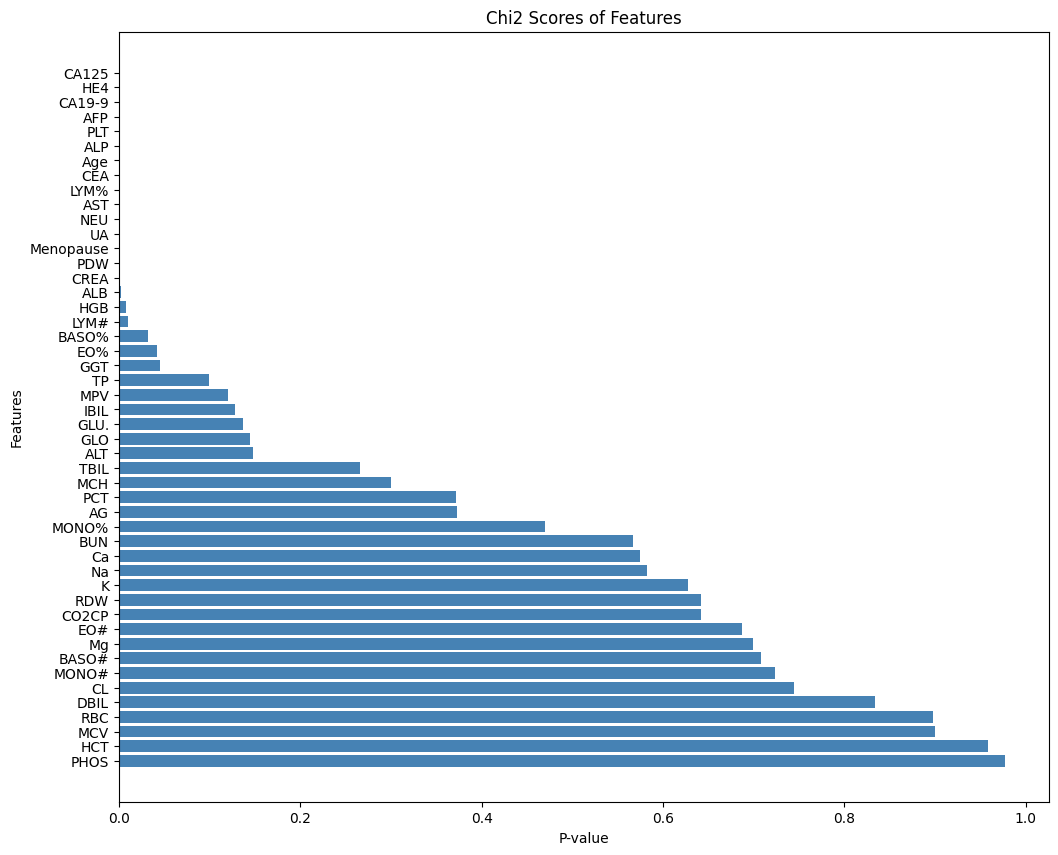

In [ ]:
plt.figure(figsize=(12, 10))
plt.barh(chi2_results['Feature'], chi2_results['P-value'], color='steelblue')
plt.xlabel('P-value')
plt.ylabel('Features')
plt.title('Chi2 Scores of Features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(chi2_results)

      Feature    Chi2 Score        P-value
11      CA125  48148.173616   0.000000e+00
24        HE4  20644.282181   0.000000e+00
12     CA19-9   2254.119227   0.000000e+00
0         AFP   1531.013026   0.000000e+00
42        PLT    607.654616  3.621400e-134
4         ALP    337.634404   2.089587e-75
2         Age    296.630566   1.785957e-66
13        CEA    252.963966   5.865205e-57
29       LYM%    186.314788   2.026626e-42
6         AST     91.875560   9.230197e-22
38        NEU     87.137993   1.012076e-20
47         UA     85.237638   2.645774e-20
32  Menopause     26.621633   2.474574e-07
40        PDW     17.079077   3.585515e-05
16       CREA     13.550048   2.322855e-04
3         ALB      9.604768   1.940728e-03
25        HGB      7.186664   7.344742e-03
28       LYM#      6.724767   9.508315e-03
8       BASO%      4.614292   3.170658e-02
19        EO%      4.153803   4.154112e-02
20        GGT      4.011709   4.518532e-02
46         TP      2.719615   9.912191e-02
36        M

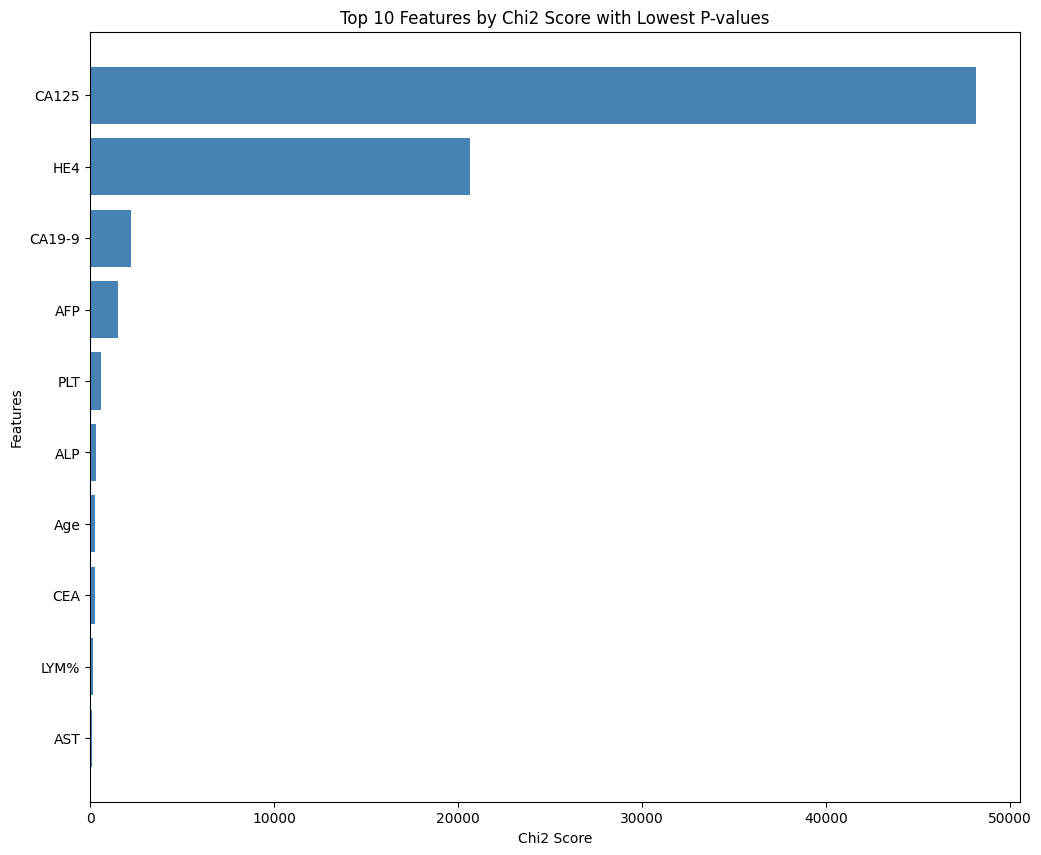

In [ ]:
top_features = chi2_results.sort_values(by='P-value').head(10)

# Plot the top 10 features
plt.figure(figsize=(12, 10))
plt.barh(top_features['Feature'], top_features['Chi2 Score'], color='steelblue')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.title('Top 10 Features by Chi2 Score with Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
selected_features_chi = top_features.Feature.tolist()

In [ ]:
selected_features_chi

['CA125', 'HE4', 'CA19-9', 'AFP', 'PLT', 'ALP', 'Age', 'CEA', 'LYM%', 'AST']

# Performance of classifiers on selected features using Chi Square

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
y.value_counts()

TYPE
0    138
1     86
Name: count, dtype: int64

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
1    138
0     86
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            57.872789
score_time           9.589915
test_accuracy       83.913043
test_recall         83.516484
test_specificity    84.861111
test_gmean          83.862862
test_roc            84.188797
test_precision      90.130037
test_mcc            68.059457
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.165753
score_time           3.301017
test_accuracy       77.252964
test_recall         68.406593
test_specificity    91.805556
test_gmean          78.952637
test_roc            80.106074
test_precision      93.064103
test_mcc            59.361766
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.562613
score_time           1.804469
test_accuracy       82.608696
test_recall         81.318681
test_specificity    85.000000
test_gmean          82.770203
test_roc            83.159341
test_precision      90.132826
test_mcc            65.601450
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             1.408594
score_time           2.012157
test_accuracy       81.699605
test_recall         84.945055
test_specificity    76.527778
test_gmean          80.296759
test_roc            80.736416
test_precision      85.553975
test_mcc            62.433676
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            18.123128
score_time           2.775917
test_accuracy       84.367589
test_recall         87.087912
test_specificity    80.138889
test_gmean          83.254703
test_roc            83.613400
test_precision      88.064103
test_mcc            67.538601
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            19.578781
score_time           3.397250
test_accuracy       87.509881
test_recall         87.087912
test_specificity    88.750000
test_gmean          87.393628
test_roc            87.918956
test_precision      93.267857
test_mcc            75.567794
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            36.718159
score_time           1.663153
test_accuracy       83.478261
test_recall         84.945055
test_specificity    81.527778
test_gmean          82.833690
test_roc            83.236416
test_precision      88.516484
test_mcc            66.412165
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            30.720172
score_time           5.342765
test_accuracy       86.620553
test_recall         85.659341
test_specificity    88.611111
test_gmean          86.854414
test_roc            87.135226
test_precision      92.497502
test_mcc            73.609061
dtype: float64